<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

In [ ]:
# More on plt and OO interfaces.

In [4]:
from matplotlib import pyplot as plt
import numpy as np

# 1 Some nomenclature

Basic features of a Matplotlib plot:
1. Title
2. Major tick
3. Minor tick
4. Legend
5. Major tick label
6. Minor tick label
7. line
8. Grid 
9. Y axis label
10. X axis label
11. Markers
12. Figure
13. Axes
14. Spines\
\
As shown below.

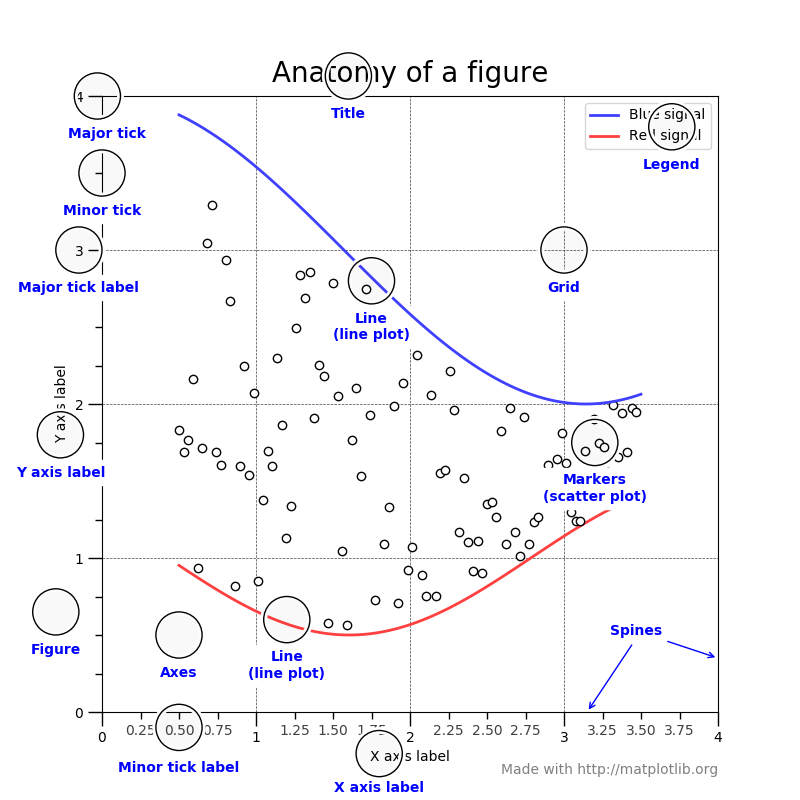

# 2 Comparing the two ‘dialects’

### pyplot Interface

In [5]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### OO Interface

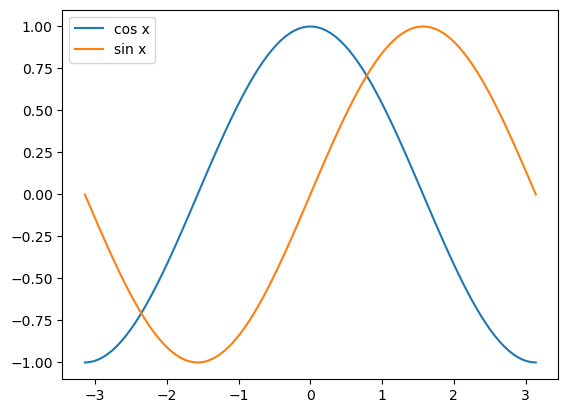

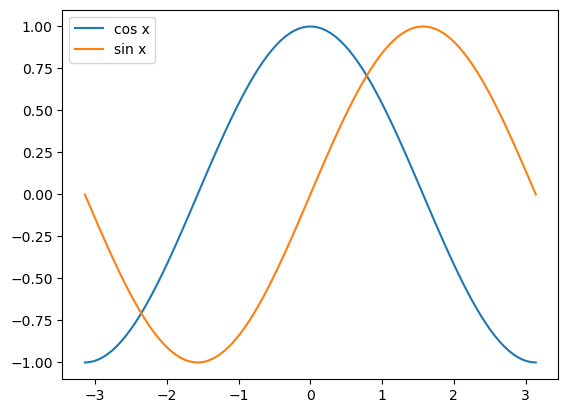

In [6]:
plt.plot(x, cos_x, label='cos x')   # This is pyplot interface.
plt.plot(x, sin_x, label='sin x')
plt.legend()
fig, ax = plt.subplots(nrows=1, ncols=1)    # This is OO interface.
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

# 3 What is OO ax, really?

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))


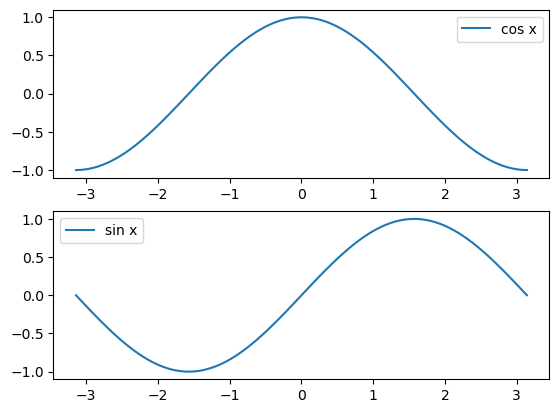

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1)   # pyplot.subplot returns a tuple (fig, ax), giving a single figure fig \
                                           #     with an array of axes ax.
print((fig, ax))
                                           # What's the purpose of fig?
ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [8]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add an Axes to the current figure or retrieve an existing Axes.
    
    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplo

In [ ]:
# ax is a NumPy array that include two objects, and both objects are Matplotlib axes.

In [12]:
type(ax)

numpy.ndarray

In [13]:
ax.shape

(2,)

In [14]:
type(ax[0])

matplotlib.axes._axes.Axes

In [16]:
type(fig)

matplotlib.figure.Figure

# 4 A complete OO example

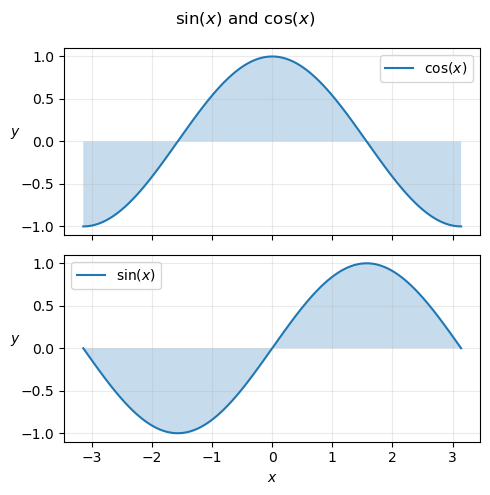

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1,    # Put the two plots in one column.
                       figsize=(5, 5),      # Create a 5 by 5 square figure.
                       sharex=True)         # Two graphs share a common x-axis.
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)  # Fill in the area enclosed by the curve and the x-axis.
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:                    # Create legend, y-label, and modify gridlines for each subplot.
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')  # A super title is a title for both graphs.
fig.tight_layout()    # Make the graphs look nicer.

# 5 Multiple rows and columns

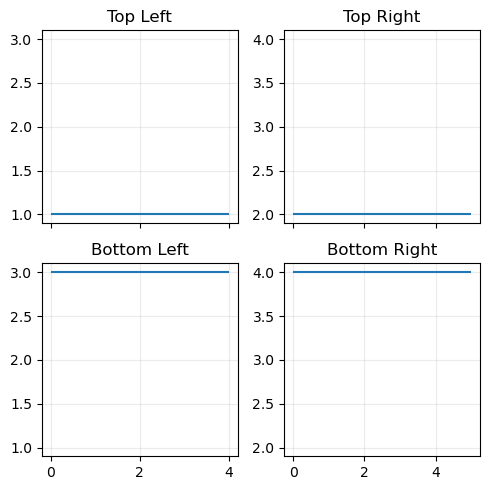

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')    # Share x and y axes by column.

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten() # Flattens ax into a 1D array (so that it's iterable).

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

In [18]:
# Now that the axes are arranged in a 2 by 2 array.
ax.shape

(2, 2)

In [19]:
# The spacial orientation of the subplots are arranged in this way.
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

In [20]:
# Rename each subplot to make it more readable.
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [21]:
# An easier approach:
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# Python flattens it into 1D array and unpacks automatically.

## 5.1 Sharing axes

In [ ]:
# In this line of code:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col') 
# We have sharex and sharey. 
# There are 3 options for each them: True, col, or row.
# Take sharex as an example: sharex=True means that all subplots use the same range for x-axis. sharex=col means \
#     all subplots in the same column use the same range for x-axis. sharex=row means all subplots in the same \
#     row use the same range for x-axis. 
# sharey is analogous. 

## 5.2 Accessing all axes

In [22]:
# When we want to modify all axes, for example, the transparency of the gridlines, instead of doing this:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

# We can use a loop:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data & A quick helper function

In [ ]:
# This code defines a function that extracts data from available .csv files. 
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

In [ ]:
# This block of code creates a histogram using the data extracted. 

plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])   # This is the dataset to be plotted:
                                                                      #      [data['All'], data['NUS']]
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

In [23]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
    
        plt.hist(bins[:-1], bins, weights=coun

## 6.2 Scatter plots

In [ ]:
# The idea behind a scatter plot is basically plotting (x,y) points one by one. 
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))   # This records the location of a datapoint in the dataset. (This is not so \
                              #     relevant, however. It is included only because scatter plot needs two 
                              #     corrdinates for every datapoint.)
    y = numbers               # This is the actual data in the dataset.
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

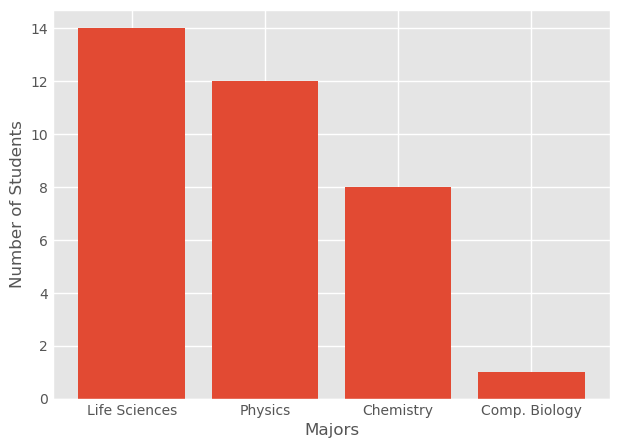

In [28]:
student_numbers = {'Life Sciences': 14,   # A dictionary.
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())      # Converts a dictionary into a list.
numbers = list(student_numbers.values())   # Converts a dictionary into a list.

plt.style.use('ggplot')
plt.bar(majors, numbers)      # Bar chart takes in two iterables: one for categories and one for values (typecast).
plt.xlabel('Majors')
plt.ylabel('Number of Students')

In [ ]:
# To create a horizontal bar chart, use barh() instead of bar().

In [24]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bottom side(s) of the bars.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coord

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

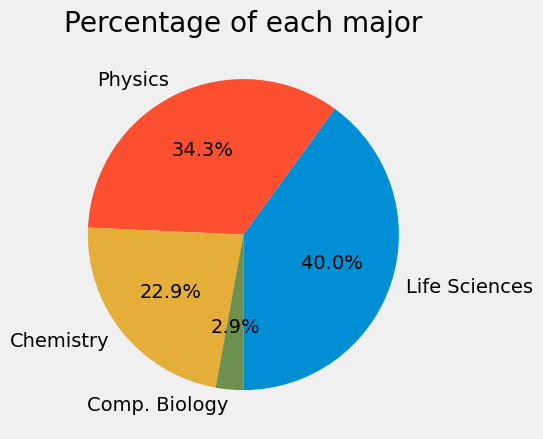

In [44]:
student_numbers = {'Life Sciences': 14,     # Again, a dictionary.
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())      # Converts a dictionary into a list.
numbers = list(student_numbers.values())   # Converts a dictionary into a list.

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%.1f%%',             # The first % means autopct shows percentage. 
                                      # .1f means up to one decimal place in decimal formatting (as in f-string).
                                      # The %% at the end means to include the '%' sign after the numeric labels.
        startangle=-90                # Start from 6 o'clock going counterclockwise (by default).
        )
plt.title('Percentage of each major')

In [25]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie